#### $ 𝑔(𝑤)=sin⁡(3𝑤)+0.3𝑤^2$

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import exp,sin,cos

In [37]:
def func_1d(x):
    return sin(3*x)+0.3*(x**2)

In [38]:
def grad_1d(x):
    return cos(3*x)*3+0.6*x

set -1 as the starting point
The 0 iteration x =  -0.9286004502039733
The 1 iteration x =  -0.86121497604162
The 2 iteration x =  -0.7999797883746049
The 3 iteration x =  -0.7461388654605454
The 4 iteration x =  -0.7000380623040404
The 5 iteration x =  -0.6613409254451632
The 6 iteration x =  -0.6293108568106506
The 7 iteration x =  -0.6030483128008333
The 8 iteration x =  -0.5816458382403009
The 9 iteration x =  -0.5642703454744818
The 10 iteration x =  -0.550196370283113
The 11 iteration x =  -0.5388115254969053
The 12 iteration x =  -0.5296084426864114
The 13 iteration x =  -0.5221714598997085
The 14 iteration x =  -0.5161623184215609
The 15 iteration x =  -0.5113068218595384
The 16 iteration x =  -0.5073831902555873
The 17 iteration x =  -0.5042122462415958
The 18 iteration x =  -0.501649307633611
The 19 iteration x =  -0.49957756559970645
The 20 iteration x =  -0.49790271119939294
The 21 iteration x =  -0.4965485905828732
The 22 iteration x =  -0.49545369845917
The 23 iteration x 

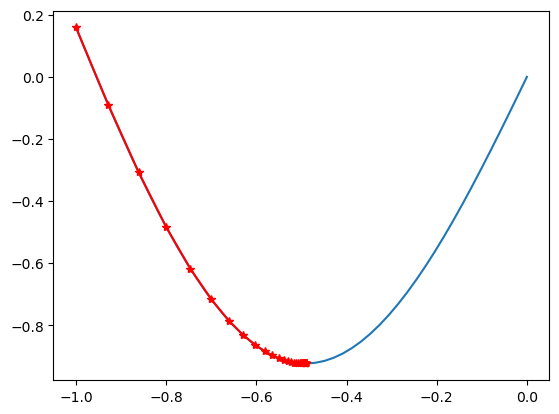

In [39]:
def gradient_descent_1d(grad, cur_x, learning_rate, precision, max_iters, history_x):
    print(f"set {cur_x} as the starting point")
    for i in range(max_iters):
        current_gradient = grad(cur_x)
        last_x = cur_x
        cur_x = cur_x - current_gradient * learning_rate
        history_x.append(cur_x)
        if abs(func_1d(last_x)-func_1d(cur_x)) < precision:
            break
        print("The", i, "iteration x = ", cur_x)
    print("local minimizer x: ", cur_x)
    print("local minimum",func_1d(cur_x))
    return history_x

plot_x=np.linspace(-1,0)
plot_y=func_1d(plot_x)
a = gradient_descent_1d(grad_1d, cur_x=-1, learning_rate=0.02, precision=1e-8, max_iters=10000,history_x=[-1])
plt.plot(plot_x,plot_y)  
plt.plot(np.array(a),func_1d(np.array(a)),color='r',marker='*')
plt.show()



[87, 44, 29, 21, 16, 13, 10, 8, 7, 5, 5, 6, 7, 7, 10, 14, 18, 25, 39]


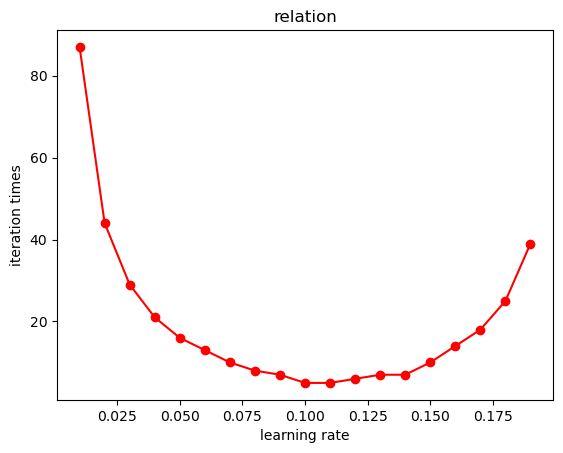

In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import exp,sin,cos

sum_eta=[]
result=[]
for i in range(1,20,1):
    x=-1
    eta=i*0.01
    sum_eta.append(eta)
    epsilon=1e-8
    num=0
    min=0
    while True:
        gradient=cos(3*x)*3+0.6*x
        last_x=x
        x=x-eta*gradient
        num=num+1
        if (abs(func_1d(last_x)-func_1d(x)) <epsilon):
            min=x
            break

    result.append(num)

plt.scatter(sum_eta,result,c='r')
plt.plot(sum_eta,result,c='r')
plt.title("relation")
plt.xlabel("learning rate")
plt.ylabel("iteration times")
plt.show
print(result)

#### $𝑔(𝑤_1,𝑤_2 )=x^2+y^2+2$

In [41]:
def function(x):
    return x[0]**2+x[1]**2+2

def Grad(x):
    D0=2*x[0]
    D1=2*x[1]
    return np.array([D0, D1])

In [42]:
def gradient_descent(grad, x, learning_rate, error, max, history):
    for i in range(max):
        Current_grad=grad(x)
        history.append(x) 
        x1=x
        x=x-Current_grad*learning_rate
        if abs(function(x)-function(x1))<error:
            break 
    print("local minimizer: ", x)
    print("local minimum is: ",function(x))
    return history

In [43]:
def graph(LR):
    a = gradient_descent(grad=Grad, x=np.array([1,1]), learning_rate=LR, error=1e-6, max=100000, history=[])
    fig=plt.figure(figsize = (7,6))
    ax1=plt.axes(projection='3d')
    
    xd=yd=np.linspace(-1,1)
    xd,yd = np.meshgrid(xd, yd)
    zd=xd**2+yd**2-xd*yd

    x0=np.array(a)[:,0]
    x1=np.array(a)[:,1]
    z=x0**2+x1**2-x0*x1

    ax1.plot3D(x0,x1,z,color='red',marker='*',label = str('Learning Rate: ')+str(LR)) 
    ax1.plot_surface(xd, yd, zd, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'),alpha=0.6)
    ax1.legend()
    plt.show()

local minimizer:  [0.00079228 0.00079228]
local minimum is:  2.0000012554203472


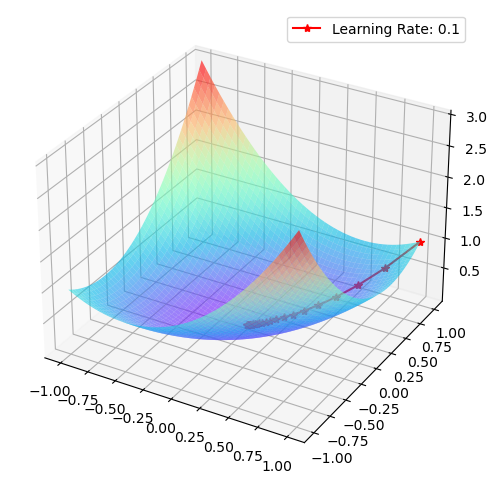

In [44]:
graph(0.1)

local minimizer:  [0.00342395 0.00342395]
local minimum is:  2.000023446851608


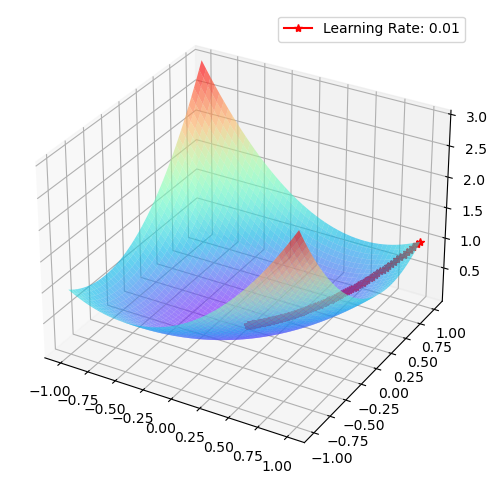

In [45]:
graph(0.01)

local minimizer:  [0.01114797 0.01114797]
local minimum is:  2.0002485544016904


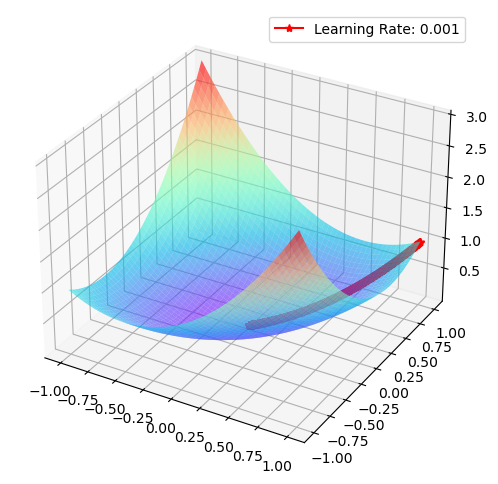

In [46]:
graph(0.001)

[7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 2, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 14, 14, 15, 16, 17, 18, 19]


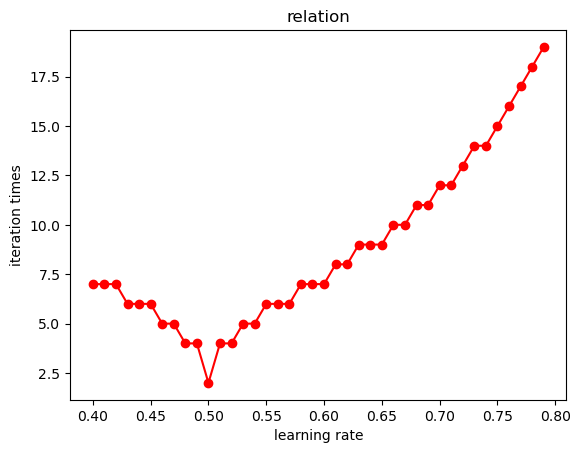

In [47]:
sum_eta=[]
result=[]
for i in range(40,80,1):
    cur_x=[1,1]
    eta=i*0.01
    sum_eta.append(eta)
    epsilon=1e-8
    num=0
    min=0
    while True:
        current_gradient = Grad(cur_x)
        last_x = cur_x
        cur_x = cur_x - current_gradient * eta
        num+=1
        if abs(function(last_x)-function(cur_x)) < epsilon:
            break  

    result.append(num)

plt.scatter(sum_eta,result,c='r')
plt.plot(sum_eta,result,c='r')
plt.title("relation")
plt.xlabel("learning rate")
plt.ylabel("iteration times")
plt.show
print(result)